In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np
from generation.data.data_preparation import generate_single_detector_output, get_detector_df,\
                                                generate_detector_output, postprocess_step_energies

In [2]:
DETECTOR = 1
EVENT = 0

df = pd.read_pickle("/home/pafakanov/data/hep_data/particles.pkl")
detector_df = get_detector_df(df, detector=DETECTOR)
mean_signal = generate_single_detector_output(detector_df, steps_num=1024, sample_coef=1.0)
mean_signal /= np.max(mean_signal)

In [3]:
output_signals = []
for event in tqdm.tqdm(detector_df['event'].unique()):
    detector_event_df = detector_df[detector_df['event'] == event]
    output_signal = generate_single_detector_output(detector_event_df, steps_num=1024, sample_coef=1.0)
    output_signal /= np.max(output_signal)
    output_signals.append(output_signal)
    
output_signals = np.array(output_signals)

100%|██████████| 23/23 [01:41<00:00,  4.43s/it]


### First way

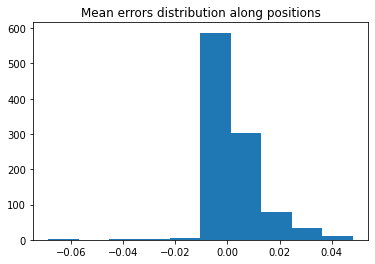

In [4]:
noises = np.array([output_signal - mean_signal for output_signal in output_signals]).T
plt.title("Mean errors distribution along positions")
plt.hist(np.mean(noises, axis=1))
plt.show()

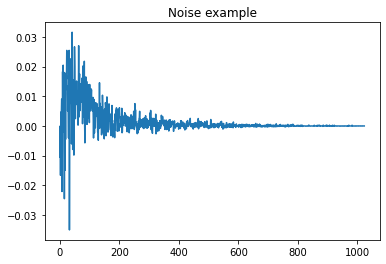

In [5]:
plt.title("Noise example")
plt.plot(noises[:, 0])
plt.show()

### Second way

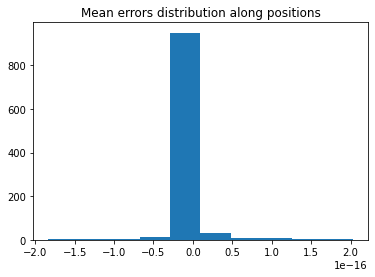

In [6]:
mean_signal_second = np.mean(output_signals, axis=0)
noises = np.array([output_signal - mean_signal_second for output_signal in output_signals]).T
plt.title("Mean errors distribution along positions")
plt.hist(np.mean(noises, axis=1))
plt.show()

##### Shapiro test

In [36]:
from scipy.stats import shapiro

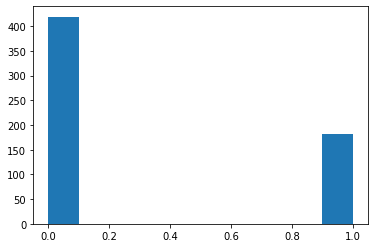

In [55]:
FIRST_POS_NUM = 600
ALPHA = 0.05

is_normal = []
for noise in noises[:FIRST_POS_NUM]:
    stat, p = shapiro(noise)

    if p > ALPHA:
        is_normal.append(1)
    else:
        is_normal.append(0)
        
plt.hist(is_normal)
plt.show()

###### D’Agostino’s K^2 Test

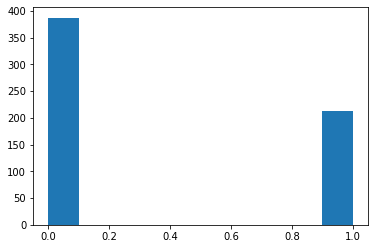

In [59]:
is_normal = []
for noise in noises[:FIRST_POS_NUM]:
    stat, p = normaltest(noise)

    if p > ALPHA:
        is_normal.append(1)
    else:
        is_normal.append(0)

plt.hist(is_normal)
plt.show()